NoteBook này là một số phân tích sơ bộ về 2 bộ dữ liệu được sử dụng trong dự án này:
* ViFactCheck ([Paper])
* ViWikiFC ([papers](https://arxiv.org/pdf/2405.07615))

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ViFactCheck


* Bộ dữ liệu ViFactCheck gồm 7232 mẫu
* Bộ dữ liệu ViFactCheck được chia thành các subset theo tỉ lệ 7:1:2 bao gồm train_data, dev_data, test_data

In [69]:
train_data = pd.read_csv('ViFactCheck/data/train_data.csv', index_col='Unnamed: 0')
dev_data = pd.read_csv('ViFactCheck/data/dev_data.csv', index_col='Unnamed: 0')
test_data = pd.read_csv('ViFactCheck/data/test_data.csv', index_col='Unnamed: 0')

In [70]:
data = pd.concat([train_data, dev_data, test_data], ignore_index=True)
data.head(5)

,index,Statement,Context,annotation_id,Topic,Author,Url,labels,Evidence,splited_sentences,Evidence_List,evidence_top5,len_evidence
0,3049,"Phó Thủ tướng Trần Hồng Hà thay mặt Chính phủ,...","(Chinhphu.vn) - Đây là mong muốn, gửi gắm của ...",18933775,Chính trị,Chính Phủ,https://baochinhphu.vn/lan-toa-nhung-gia-tri-v...,0,"Thay mặt Chính phủ, Thủ tướng Chính phủ, Phó T...","['(Chinhphu.vn) - Đây là mong muốn, gửi gắm củ...","['Thay mặt Chính phủ, Thủ tướng Chính phủ, Phó...",['Phó Thủ tướng Trần Hồng Hà: Các tác phẩm tru...,1
1,6811,Hành vi của Tô Văn Hải là cho phép người khác ...,"Ngày 24/3, Cơ quan Cảnh sát điều tra Công an t...",19402113,PHÁP LUẬT,Tin Tức,https://baotintuc.vn/an-ninh-trat-tu/bat-tam-g...,0,Tô Văn Hải đã có hành vi cho phép người khác đ...,"['Ngày 24/3, Cơ quan Cảnh sát điều tra Công an...",['Tô Văn Hải đã có hành vi cho phép người khác...,"['Theo đó, Tô Văn Hải là người trực tiếp điều ...",2
2,7270,SAWACO thông báo tạm ngưng cung cấp nước để th...,(PLO)- Theo Tổng Công ty Cấp nước Sài Gòn (SAW...,19807472,ĐÔ THỊ,Báo Pháp Luật HCM,https://plo.vn/9-quan-huyen-o-tphcm-se-bi-cup-...,1,SAWACO thông báo tạm ngưng cung cấp nước để th...,['(PLO)- Theo Tổng Công ty Cấp nước Sài Gòn (S...,['SAWACO thông báo tạm ngưng cung cấp nước để ...,"['Vì vậy, SAWACO thông báo tạm ngưng cung cấp ...",2
3,7423,"CLB luôn chuẩn bị rất kỹ lưỡng, chỉn chu chươn...","Với khoảng 200 thành viên, UEF Warm Hugs Club ...",19725173,Giáo dục,Người lao động,https://nld.com.vn/giao-duc-khoa-hoc/hanh-trin...,2,Là chương trình lớn nhất của CLB trong năm nên...,"['Với khoảng 200 thành viên, UEF Warm Hugs Clu...",['Là chương trình lớn nhất của CLB trong năm n...,['Là chương trình lớn nhất của CLB trong năm n...,1
4,6632,"ILA tiếp nhận và hỗ trợ học sinh miễn phí, Bé ...","Đi qua 2 năm dịch bệnh đầy thử thách, nhưng ch...",19021291,Giáo dục,Thanh Niên,https://thanhnien.vn/giao-duc-anh-ngu-phat-tri...,2,"Bé được tham gia kiểm tra trình độ đầu vào, tư...","['Đi qua 2 năm dịch bệnh đầy thử thách, nhưng ...","['Bé được tham gia kiểm tra trình độ đầu vào, ...","['Bé được tham gia kiểm tra trình độ đầu vào, ...",1


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7232 entries, 0 to 7231
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7232 non-null   int64 
 1   Statement          7232 non-null   object
 2   Context            7232 non-null   object
 3   annotation_id      7232 non-null   int64 
 4   Topic              7232 non-null   object
 5   Author             7232 non-null   object
 6   Url                7232 non-null   object
 7   labels             7232 non-null   int64 
 8   Evidence           7232 non-null   object
 9   splited_sentences  7232 non-null   object
 10  Evidence_List      7232 non-null   object
 11  evidence_top5      7232 non-null   object
 12  len_evidence       7232 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 734.6+ KB


In [72]:
data.describe()

,index,annotation_id,labels,len_evidence
count,7232.000000,7.232000e+03,7232.00000,7232.000000
mean,3773.993778,1.897953e+07,0.97677,1.370437
std,2177.491483,5.309295e+05,0.81966,0.661546
min,0.000000,1.812040e+07,0.00000,1.000000
25%,1897.750000,1.854255e+07,0.00000,1.000000
50%,3766.500000,1.886460e+07,1.00000,1.000000
75%,5656.250000,1.951352e+07,2.00000,2.000000
max,7553.000000,1.998654e+07,2.00000,9.000000


In [73]:
data['Topic'].value_counts()

Topic
Giáo dục                   509
Thế giới                   361
Quốc tế                    331
Xã hội                     330
Kinh tế                    317
Thời sự                    307
Thể thao                   303
Pháp luật                  291
Chính trị                  270
THỂ THAO                   269
GIÁO DỤC                   246
Công nghệ                  224
Văn hoá                    197
Kinh doanh                 195
PHÁP LUẬT                  193
Văn hóa                    193
Giải trí                   184
XÃ HỘI                     180
KINH TẾ                    170
Sức khoẻ                   169
SỨC KHỎE                   144
Giới trẻ                   133
Giáo dục - Hướng nghiệp    117
Du lịch                    117
Thời Sự                    116
QUỐC TẾ                    104
THẾ GIỚI                   102
VĂN HÓA                    100
Khoa học                    91
Giải Trí                    81
ĐÔ THỊ                      80
KHOA HỌC CÔNG NGHỆ        68
TH

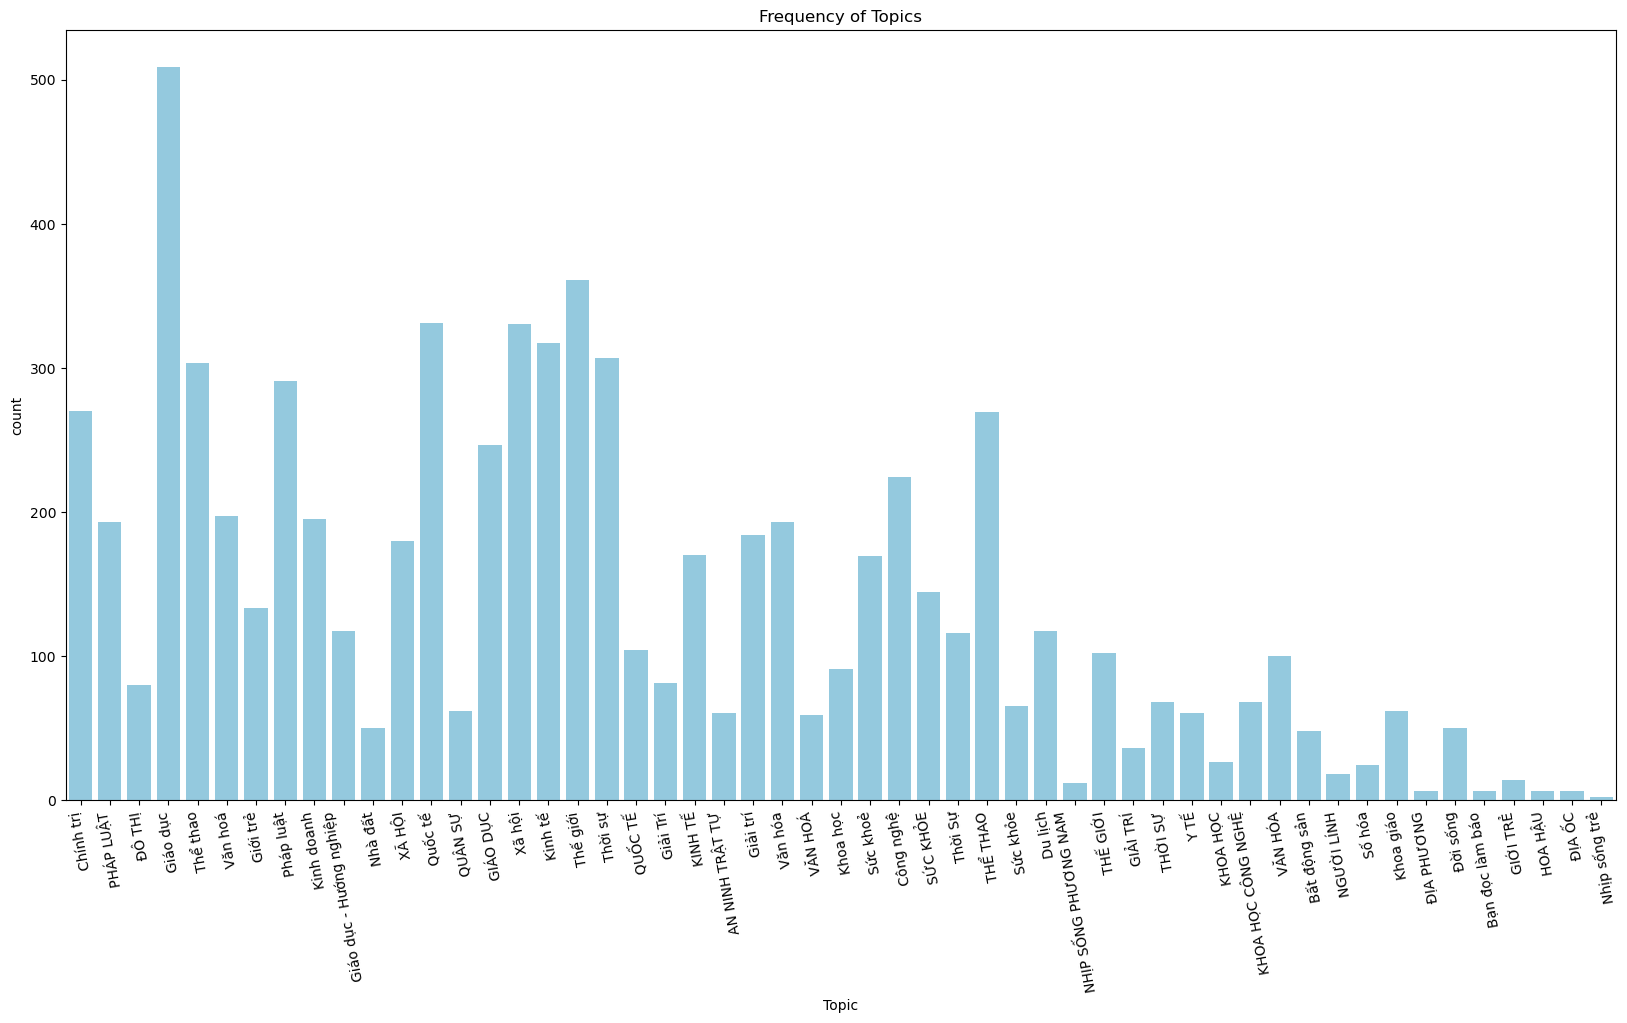

In [74]:
plt.figure(figsize = (20,10))
sns.countplot(x='Topic', data=data, color='skyblue')
plt.title('Frequency of Topics')
plt.xticks(rotation=100)
plt.show()

In [75]:
data['len_evidence'].value_counts()

len_evidence
1    5080
2    1765
3     293
4      64
5      20
6       7
9       1
8       1
7       1
Name: count, dtype: int64

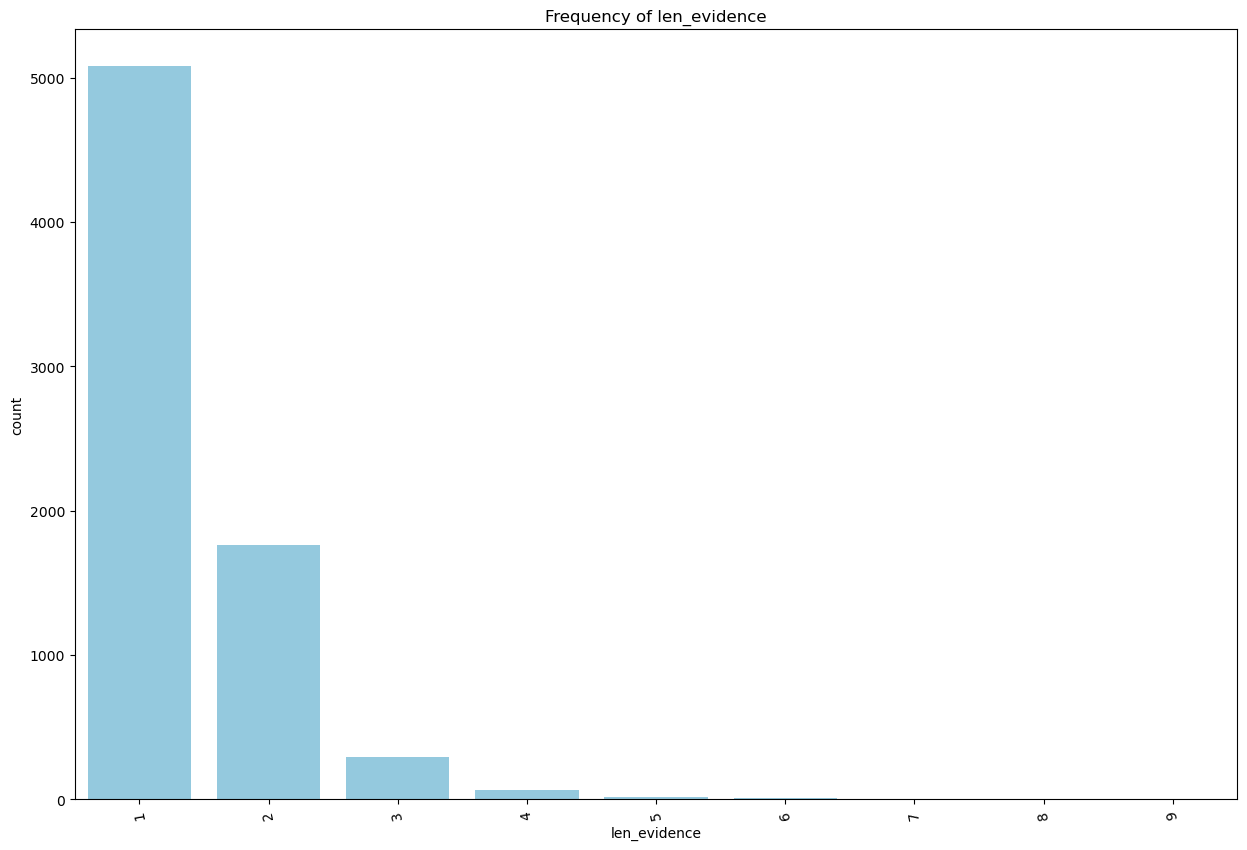

In [76]:
plt.figure(figsize = (15,10))
sns.countplot(x='len_evidence', data=data, color='skyblue')
plt.title('Frequency of len_evidence')
plt.xticks(rotation=100)
plt.show()

In [77]:
data['labels'].value_counts()

labels
0    2515
1    2370
2    2347
Name: count, dtype: int64

In [78]:
stat_data = pd.DataFrame()
stat_data['context_length'] = data['Context'].apply(lambda x: len(x.split()))

# Basic statistics
stats = {
    'avg_context_length': stat_data['context_length'].mean(),
    'max_context_length': stat_data['context_length'].max(),
    'min_context_length': stat_data['context_length'].min(),
}
# Display the statistics
print("\n--- Context Statistics ---")
for stat, value in stats.items():
    print(f"{stat}: {value}")


--- Context Statistics ---
avg_context_length: 690.3275719026549
max_context_length: 3602
min_context_length: 71


In [79]:
stat_data['statement_length'] = data['Statement'].apply(lambda x: len(x.split()))

# Basic statistics
stats = {
    'avg_statement_length': stat_data['statement_length'].mean(),
    'max_statement_length': stat_data['statement_length'].max(),
    'min_statement_length': stat_data['statement_length'].min()
}
# Display the statistics
print("\n--- Statement Statistics ---")
for stat, value in stats.items():
    print(f"{stat}: {value}")


--- Statement Statistics ---
avg_statement_length: 35.79950221238938
max_statement_length: 165
min_statement_length: 7


In [80]:
# Calculate the length of each evidence (assuming ';' separates multiple pieces of evidence)
data['Evidence_List'] = data['Evidence'].apply(lambda x: x.split(';'))

# Calculate word count for each piece of evidence
evidence_lengths = data['Evidence_List'].apply(lambda ev_list: [len(e.strip().split()) for e in ev_list])

# Add evidence lengths to the DataFrame
data['Evidence_Lengths'] = evidence_lengths

# Calculate statistics for multi-evidence word lengths
evidence_stats = {
    'avg_evidence_length': evidence_lengths.apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0).mean(),
    'max_evidence_length': evidence_lengths.apply(max).max(),
    'min_evidence_length': evidence_lengths.apply(min).min(),
    'total_evidence_count': evidence_lengths.apply(len).sum(),
}

# Display evidence statistics
for stat, value in evidence_stats.items():
    print(f"{stat}: {value}")


avg_evidence_length: 41.94560518067846
max_evidence_length: 219
min_evidence_length: 0
total_evidence_count: 7616


**Kết luận:**

* Chiều dài trung bình của 'Context' khoảng 690 từ với context dài nhất là 3603 từ và ngắn nhất là 71 từ. 
* Chiều dài trung bình các câu mệnh đề khoảng 36 từ với câu dài nhất là 165 từ và nhắn nhất là 7 từ.
* Số lượng evidence đa dạng, đa số là 1 evidence và số lượng evidence nhiều nhất là 9.
*


# ViWikiFC

* Bộ dữ liệu ViWikiFC gồm 20919 sample và 9 feature
* Bộ dữ liệu ViWikiFC được chia thành các subset theo tỉ lệ 8:1:1 bao gồm train_data, dev_data, test_data

In [81]:
train_data = pd.read_csv('ViWikiFC/data/train_final.csv')
dev_data = pd.read_csv('ViWikiFC/data/dev_final.csv')
test_data = pd.read_csv('ViWikiFC/data/test_final.csv')

In [82]:
data = pd.concat([train_data, dev_data, test_data], ignore_index=True)
data.head(5)

,pairID,evidence,gold_label,link,context,sentenceID,claim,annotator_labels,title
0,uit_424_27_39_3_11,Chế độ quân chủ chuyên chế đã tỏ ra quá già cỗ...,Supports,https://vi.wikipedia.org/Trung Quốc,"Cuối thời nhà Thanh, do sự lạc hậu về khoa học...",uit_424_27_39_3,Chế độ quân chủ chuyên chế của nhà Thanh đã tỏ...,['Support'],Trung Quốc
1,uit_817_41_89_5_11,Một cuộc đảo chính lật đổ nền quân chủ và thàn...,Supports,https://vi.wikipedia.org/thế kỷ XX,1962: Khủng hoảng tên lửa Cuba. Algérie giành ...,uit_817_41_89_5,Đảo chính và lập ra chính quyền Cộng hòa Ả Rập...,['Support'],thế kỷ XX
2,uit_854_44_98_3_12,"Năm 1956, sau khi Pháp hoàn tất rút quân khỏi ...",Supports,https://vi.wikipedia.org/quần đảo Hoàng Sa,Năm 1954 - Hiệp định Genève quy định lấy vĩ tu...,uit_854_44_98_3,"Năm 1956, sau khi Pháp rút quân khỏi Việt Nam,...",['Support'],quần đảo Hoàng Sa
3,uit_948_53_29_11_12,Các hải tặc người Mã Lai và Dayak Biển từ hang...,Supports,https://vi.wikipedia.org/Borneo,"Từ khi Malacca thất thủ vào năm 1511, các thươ...",uit_948_53_29_11,Các tàu biển trên cuộc hành trình giữa Singapo...,['Support'],Borneo
4,uit_65_5_1_4_11,Singapore là quốc gia có mức độ đô thị hóa rất...,Supports,https://vi.wikipedia.org/Singapore,Singapore (phát âm: “Xin-ga-po” hoặc “Xinh-ga-...,uit_65_5_1_4,Singapore là một quốc gia mà ở đó có mức đô th...,['Support'],Singapore


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20919 entries, 0 to 20918
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pairID            20919 non-null  object
 1   evidence          20919 non-null  object
 2   gold_label        20919 non-null  object
 3   link              20919 non-null  object
 4   context           20919 non-null  object
 5   sentenceID        20919 non-null  object
 6   claim             20919 non-null  object
 7   annotator_labels  20919 non-null  object
 8   title             20919 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB
